In [1]:
# first, read in the data

import os
import csv

os.chdir('../data/')

records = []

with open('call_records.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        records.append(row)

print(records[0]) # print the header
records = records[1:] # remove the header
print(records[0]) # print an example record

['time', 'cell', 'from', 'to']
['0', '186', '974-703-1399', '876-251-8837']


I decided that calls per hour is maybe worthwhile - different people have different patters of cell usage, perhaps.

In [2]:
all_numbers = list(set([r[2] for r in records]))

def calc_calls_per_hour(records):
    call_times = [int(r[0]) for r in records]
    first_call = min(call_times)
    last_call = max(call_times)
    total_calls = len(call_times)
    active_duration = last_call - first_call
    calls_per_hour = total_calls / active_duration
    return calls_per_hour

cph = []
for number in all_numbers:
    n_calls_hour = calc_calls_per_hour([r for r in records if r[2] == number])
    cph.append(n_calls_hour)

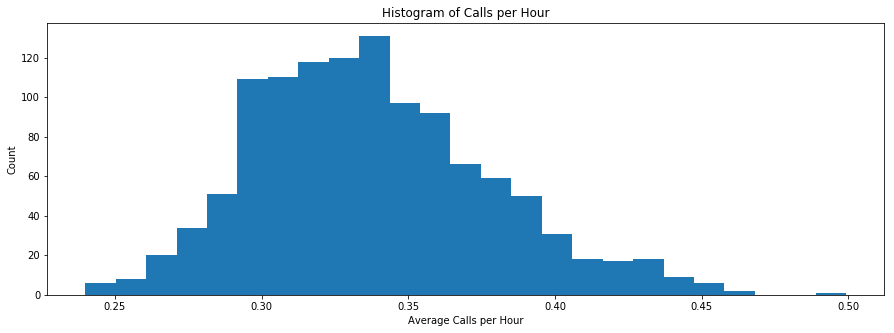

In [3]:
import matplotlib.pyplot as plt # import our graphing module
plt.rcParams["figure.figsize"] = (15,5) # set the default figure size

n, bins, patches = plt.hist(cph, 25)

plt.xlabel('Average Calls per Hour')
plt.ylabel('Count')
plt.title('Histogram of Calls per Hour')
plt.show()

Alright, well, it looks like it's at least spread out a little, so it should have at least a little bit of predictive power. (Thing to think about: what if people's different phone numbers had different "calls per day" characteristics - for example, if they used their burner way less?)

For the next feature, let's try to see if different people have a different number of regular contacts ("friends").

In [4]:
def calc_num_friends(records):
    recipients = [r[3] for r in records]
    uniq_recipients = sorted(list(set(recipients)))
    freq = [recipients.count(x) for x in uniq_recipients]
    average_freq = sum(freq) / len(freq)
    friends = [x for (x,y) in zip(uniq_recipients, freq) if y > average_freq]
    return len(friends)

num_friends = []
for num in all_numbers:
    num_friends.append(calc_num_friends([r for r in records if r[2] == num]))

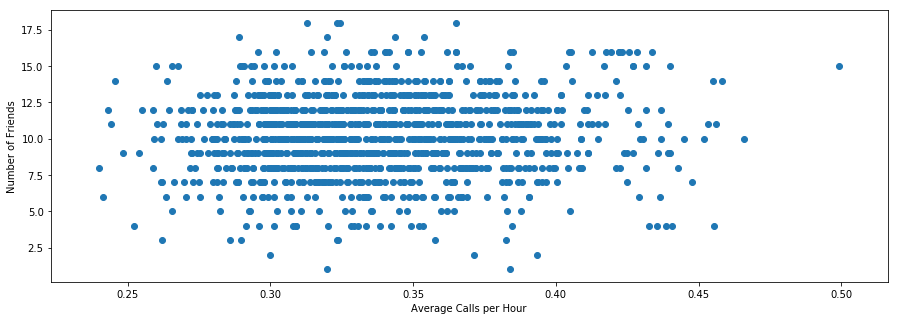

In [5]:
plt.scatter(cph, num_friends)

plt.xlabel('Average Calls per Hour')
plt.ylabel('Number of Friends')
plt.show()

Neat, looks like they do. That's going to be a rough cloud to try to cluster, but we're going to stick with these two features for now . Perhaps if you added more features (or choose different ones), you'd be able to find a pattern in the data. :)

Another note: more features will give you more predictive power - for example:

_Maybe there are ten people with the same number of friends, five with the same number of friends AND the same calls per hour, but only one with the same number of friends, the same calls per hour, AND some other feature - so you need all three to separate that one person from the crowd._

BUT keep in mind that you should avoid adding complication as much as you can. Simpler models are easier to understand, easier to compute, easier to generalize, and avoid the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). It might sound a little silly, but being able to see a model on a graph (like you can above) is invaluable to understanding it, and thus making it better. Of course, you can rarely get by with only two features, so it's a tradeoff you need to make. :)


In [6]:
# let's store our data for later using some Jupyter magic
# see: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

%store cph
%store num_friends

Stored 'cph' (list)
Stored 'num_friends' (list)
